<h1 style='color: #C9C9C9'>Machine Learning with Python<img style="float: right; margin-top: 0;" width="240" src="../../Images/cf-logo.png" /></h1> 
<p style='color: #C9C9C9'>&copy; Coding Fury 2022 - all rights reserved</p>

<hr style='color: #C9C9C9' />

# K Nearest Neighbors

## The Iris Dataset

![Iris Flowers](../../Images/iris-machinelearning.png)

The Iris Dataset provides 4 measurements from each iris flower: 
- Petal length and width
- Sepal length and width

Based on these 4 variables, it should be possible to predict which of 3 varieties any given iris flower is.


# Classification with k-Nearest Neighbors

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Note that you will choose a value for k. In the case of the iris dataset, the flowers are grouped into 3 classes, so k=3.
* Any new data point will be assigned a category based on the 3 closest data points in the training set.
* knn uses a majority vote to determine which category to put the new point into. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
iris_df = pd.read_csv("../../Data/iris.csv")

In [3]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Initial Look

Let's have an initial look at the data to see if the "features" we have can be used to determine the species of iris

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Note**
* no missing values in any columns
* however the species is a string and we SciKit Learn can only work with numerical values

## We need the Species to be numerical for charting - convert it to a Category

In [5]:
iris_df["Category"] = iris_df["Species"].astype("category") # a category is a bit like an enum in programming. It's numerical under the hood
                                                            # We could also have used SciKit Learn's LabelEncoder 

## Do Sepal measurements help when predicting species? 

In [6]:
import seaborn as sns

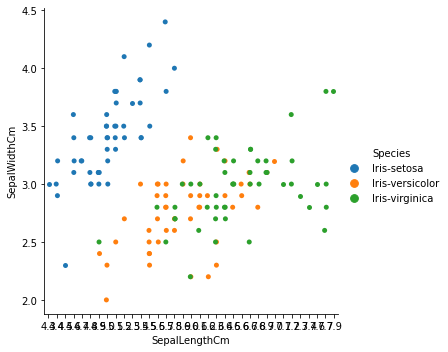

In [7]:
sns.catplot(x="SepalLengthCm", y="SepalWidthCm", data=iris_df, hue='Species')

ColorMaps: https://matplotlib.org/stable/gallery/color/colormap_reference.html

### No, not really

## Do Petal measurements help when predicting species? 


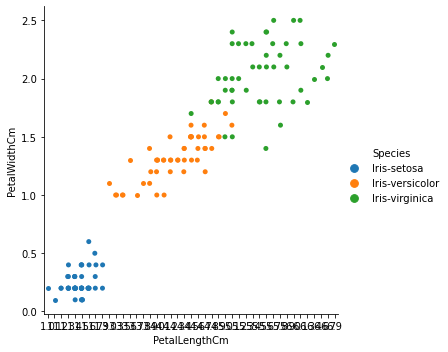

In [8]:
sns.catplot(x="PetalLengthCm", y="PetalWidthCm", data=iris_df, hue='Species')

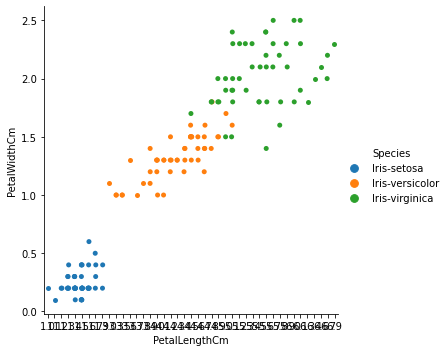

In [9]:
sns.catplot(x="PetalLengthCm", y="PetalWidthCm", data=iris_df, hue='Species')

### Yes! We can work with that!

---

# Train the kNN model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
features = ["PetalLengthCm","PetalWidthCm"]

In [12]:
X = iris_df[features].values # this is the contents of the column as a numpy array
y = iris_df["Species"].values

In [13]:
print(X.shape, y.shape)

(150, 2) (150,)


In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X,y)

KNeighborsClassifier()

Make up some new values for testing purposes

In [16]:
X_new = np.array([
    [2,0.2],
    [1.4,0.3],
    [3.9,3.7],
    [4.6, 1.4]
    ])

In [17]:
predictions = knn.predict(X_new)

In [18]:
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

___

# How good is our model? 

## Measuring Model Performance

In order to measure the performance of our model we need to: 

1. Get some data that's not part of our training set, for which we know the target value.
2. The easiest way to achieve this is to split our dataset in two parts. We'll use 70% of it for training, and we'll withhold 30% for testing.
3. Measure how well our predictions fared against the correct answer, by calculating the accuracy.

$$ accuracy = \frac{correct \space predictions}{total \space observations} $$

## Splitting data into Training and Test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

## Explanation

```test_size=0.3``` 

> This sets 30% of our data as test set i.e. 70% will be used to train our model

```random_state=21```

> This is a seed for a random number generator that splits the data i.e. test rows are selected at random based on the seed. 
>  Choosing the same number will guarantee the same rows are selected for the split each time, making our program repeatable, with the same rows in the training and test set each time.

```stratify=y```

> This guarantees that proportion of rows that have setosa, virginica and versicolor are the same in both the training and test data sets. 

**RETURENED VALUES**

The data is returned as a tuple that contains 4 variales

```X_train``` 
> this is the training data

```X_test```
> this is the test data

```y_train```
> the traing data labels labels (in this case the species)

```y_test```
> the test data labels


## Calculating the accuracy score

In [21]:
knn.score(X_test, y_test)

0.9777777777777777

Our accuracy is therefore 97.8%, which is high, but could we have done better?

Can you improve the accuracy by changing the value of ```n_neighbors```? Try different values. Start with 3, and gradually increase the number


k is large
* less complex model
* new observations are compared against a large number of neighbors
* can cause underfitting

k is small 
* more complex model 
* new observations are compared against a small number of neighbors
* can cause overfitting i.e. one erroneous value could strongly impact a prediction

In [22]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,31)

In [23]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

## Plotting the accuracy for each value of n_neighbors

## Model Complexity Curve

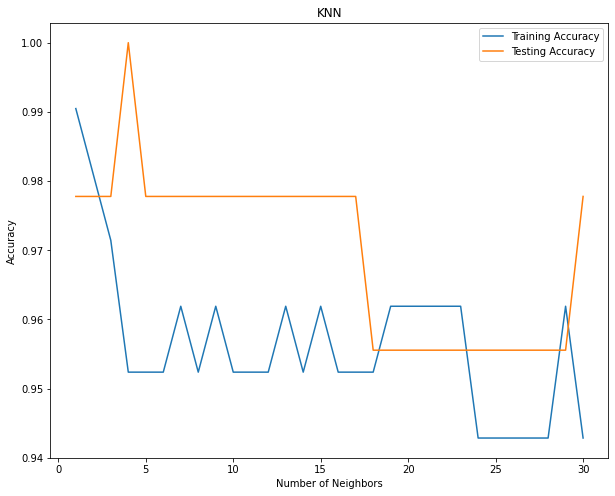

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title("KNN")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

For this dataset most the values of n_neighbors offer a good fit. 

The peak test accuracy occurs at neighbours=4

Ideally the Training data should be a better fit than the test data, so this indicates that our sample size of 150 records probably isn't big enough. 

An example of the kind of chart we would expect to see is shown below

![Model Complexity Curve](../../Images/knn-model-complexity-curve.png)



# Plot decision boundaries

To plot Desicion boundaries you need to make a meshgrid. You can use np.meshgrid to do this. np.meshgrid requires min and max values of X and Y and a meshstep size parameter. It is sometimes prudent to make the minimal values a bit lower then the minimal value of x and y and the max value a bit higher.



In [25]:
h = .02  # step size in the mesh

In [26]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


In [27]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))


You then feed your classifier your meshgrid like so ```Z=knn.predict(np.c_[xx.ravel(), yy.ravel()])```

You need to reshape the output of this to be the same format as your original meshgrid 

```Z = Z.reshape(xx.shape)```

Finally when you are making your plot you need to call ```plt.pcolormesh(xx, yy, Z, cmap=cmap_light)``` 

This will make the decision boundaries visible in your plot.


In [28]:
# Create color maps
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


In [29]:
type(y)

numpy.ndarray

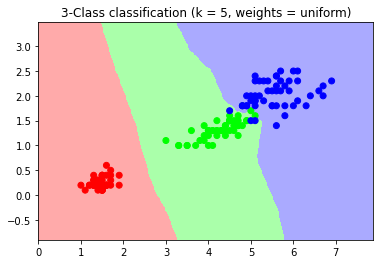

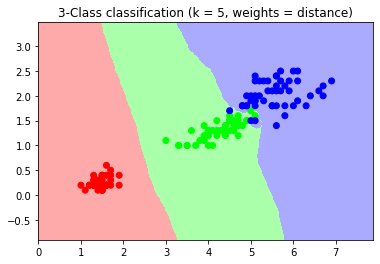

In [30]:
features = ["PetalLengthCm","PetalWidthCm"]
X = iris_df[features].values # this is the contents of the column as a numpy array
y = iris_df["Category"].cat.codes  # the numerical value of each category

neighbors = 5
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    knn = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)
    knn.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.rcParams['pcolor.shading'] ='nearest'
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {neighbors}, weights = {weights})")

plt.show()

The above example used code taken from: 
https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_classification.html#sphx-glr-auto-examples-neighbors-plot-nca-classification-py


# Next steps

Try different Classifiers on this dataset

Original: https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b
